In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 📐 Recta de mínimos cuadrados

En regresión lineal buscamos la recta que **mejor se ajusta a los datos**.  
La medida de "qué tan buena es" una recta suele ser el **Error Cuadrático Medio (MSE)**:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

La regresión lineal encuentra los coeficientes $w$ y $b$ que **minimizan** este error.  

In [12]:
#dataset artificial
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.squeeze() + 1 + np.random.normal(0, 2, size=100)

In [13]:
X.shape
y.shape

(100,)

In [14]:
#entrenamos regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [15]:
#definimos algunas rectas a mano
def recta(x, pendiente, intercepto):
    return pendiente * x + intercepto

rectas = [
    (1, 0),   # recta más "suave"
    (2, 1),   # la recta real (sin ruido)
    (2.5, -1) # recta con otra pendiente
]

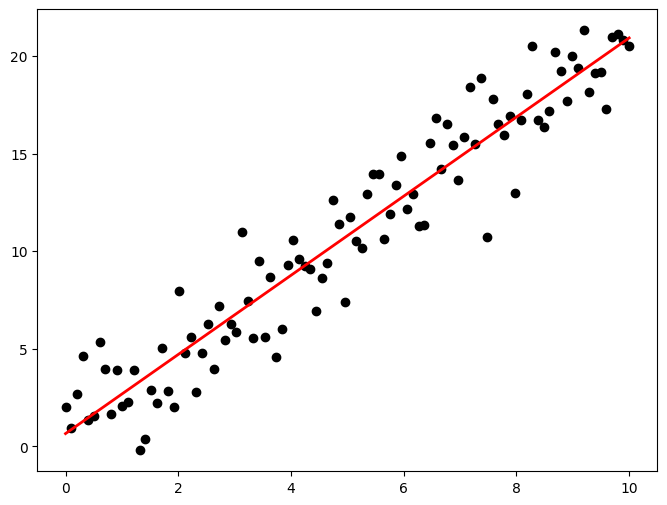

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="black", label="Datos reales")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regresión lineal")

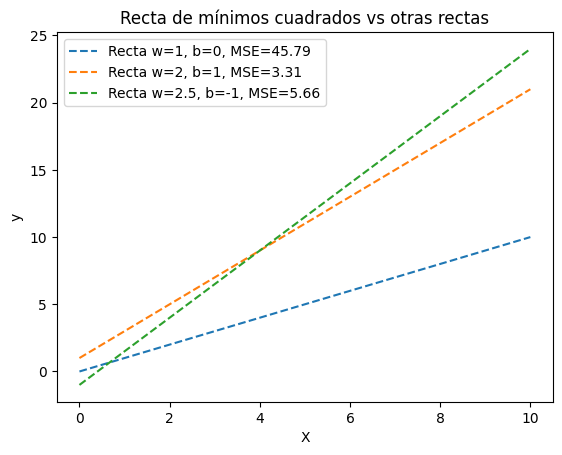

In [17]:
# Graficamos las otras rectas
for w, b in rectas:
    y_r = recta(X, w, b)
    mse = mean_squared_error(y, y_r)
    plt.plot(X, y_r, "--", label=f"Recta w={w}, b={b}, MSE={mse:.2f}")

plt.legend()
plt.title("Recta de mínimos cuadrados vs otras rectas")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [18]:
model.coef_

array([2.02758653])

In [19]:
model.intercept_

np.float64(0.6543742918452455)

👉 Observa que:
- La regresión lineal encuentra la **recta roja**.
- Si probamos otras rectas (azules, verdes...), siempre dan un **MSE mayor**.
- La regresión lineal garantiza que los residuos (errores) se compensan y la suma de ellos es ~0.

## 🎲 Efecto del ruido en la regresión lineal

En teoría, la regresión lineal encuentra la recta que **mejor se ajusta en promedio**.  
Sin embargo, si los datos tienen mucho **ruido**, el ajuste se vuelve menos preciso.

Vamos a generar tres datasets con distintos niveles de ruido y comparar los resultados.


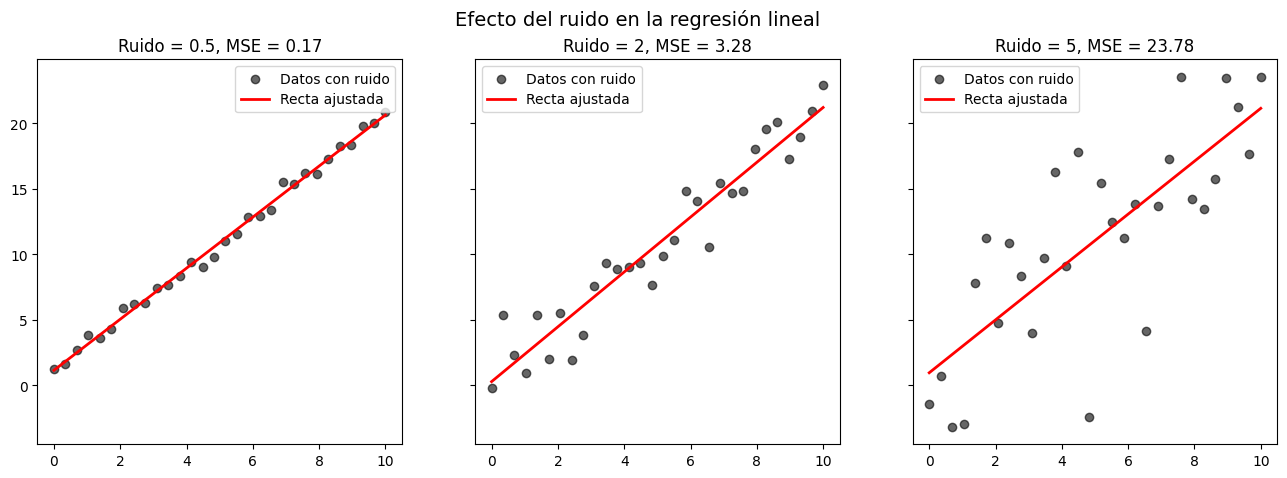

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dataset base
np.random.seed(42)
X = np.linspace(0, 10, 30).reshape(-1, 1)

# Tres niveles de ruido
ruidos = [0.5, 2, 5]
fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for i, ruido in enumerate(ruidos):
    y = 2 * X.squeeze() + 1 + np.random.normal(0, ruido, size=len(X))

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)

    axes[i].scatter(X, y, color="black", alpha=0.6, label="Datos con ruido")
    axes[i].plot(X, y_pred, color="red", linewidth=2, label="Recta ajustada")
    axes[i].set_title(f"Ruido = {ruido}, MSE = {mse:.2f}")
    axes[i].legend()

plt.suptitle("Efecto del ruido en la regresión lineal", fontsize=14)
plt.show()


👉 Observa que:
- Con **poco ruido**, la recta se ajusta muy cerca de los datos.
- A medida que el **ruido aumenta**, los puntos se dispersan más y el error (MSE) crece.
- Aun así, la regresión lineal sigue capturando la **tendencia general** de los datos.


## 📊 Interpretación de los coeficientes $b$ y $w$

En regresión lineal, el modelo es:

$$
\hat{y} = b + w x
$$

- **$b$ (intersección):** es el valor de $\hat{y}$ cuando $x = 0$.  
- **$w$ (pendiente):** indica cuánto cambia $\hat{y}$ cuando $x$ aumenta en 1 unidad.

Veamos cómo cambian estos coeficientes si escalamos la variable $X$.


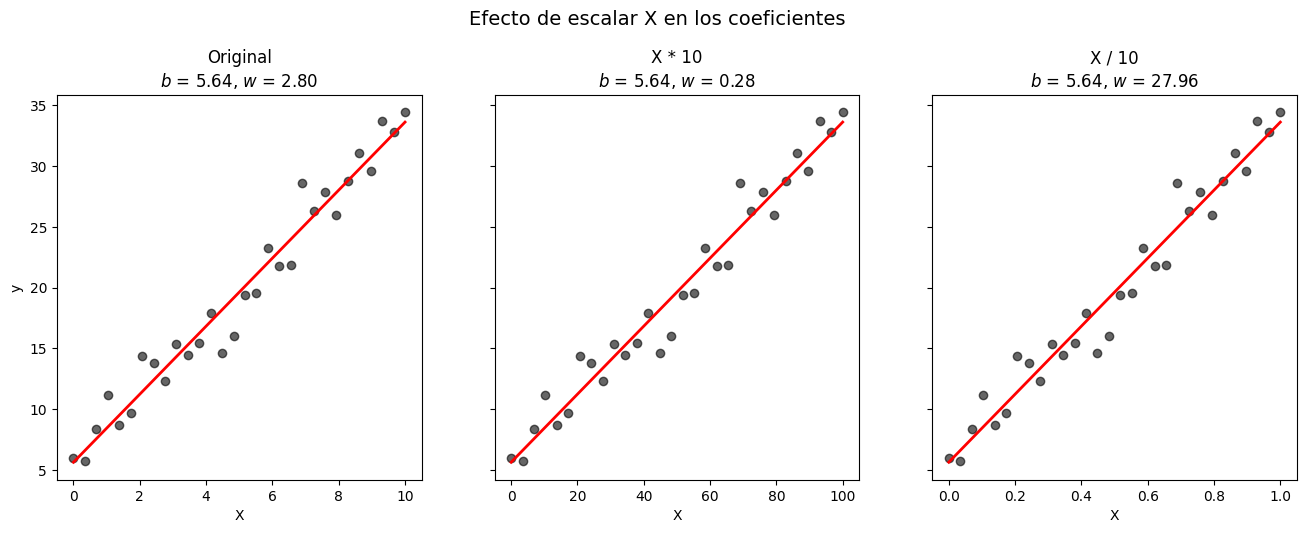

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.linspace(0, 10, 30).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.normal(0, 2, size=len(X))

# Escalados distintos
escalas = {
    "Original": X,
    "X * 10": X * 10,
    "X / 10": X / 10
}

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for i, (nombre, X_mod) in enumerate(escalas.items()):
    model = LinearRegression()
    model.fit(X_mod, y)
    y_pred = model.predict(X_mod)

    b0, b1 = model.intercept_, model.coef_[0]

    axes[i].scatter(X_mod, y, color="black", alpha=0.6)
    axes[i].plot(X_mod, y_pred, color="red", linewidth=2)
    axes[i].set_title(f"{nombre}\n$b$ = {b0:.2f}, $w$ = {b1:.2f}")
    axes[i].set_xlabel("X")

axes[0].set_ylabel("y")
plt.suptitle("Efecto de escalar X en los coeficientes", fontsize=14, y=1.05) # <-- Aquí está el cambio
plt.show()

👉 Observa que:
- Cuando multiplicamos $X$ por 10, la pendiente ($b_1$) se reduce ≈10 veces.  
- Cuando dividimos $X$ por 10, la pendiente ($b_1$) aumenta ≈10 veces.  
- El modelo siempre captura la misma **relación lineal**, pero los coeficientes dependen de la escala de la variable.


## 🎢 Sobreajuste con polinomios

La regresión lineal ajusta una recta.  
Pero podemos ampliar el modelo y ajustar un **polinomio** de grado mayor:

$$
\hat{y} = b + w_1 x + w_2 x^2 + \dots + w_d x^d
$$

- Con **grado bajo**, el modelo puede quedarse corto (subajuste).  
- Con **grado muy alto**, el modelo puede ajustarse demasiado a los datos (sobreajuste).  

Veamos un ejemplo.


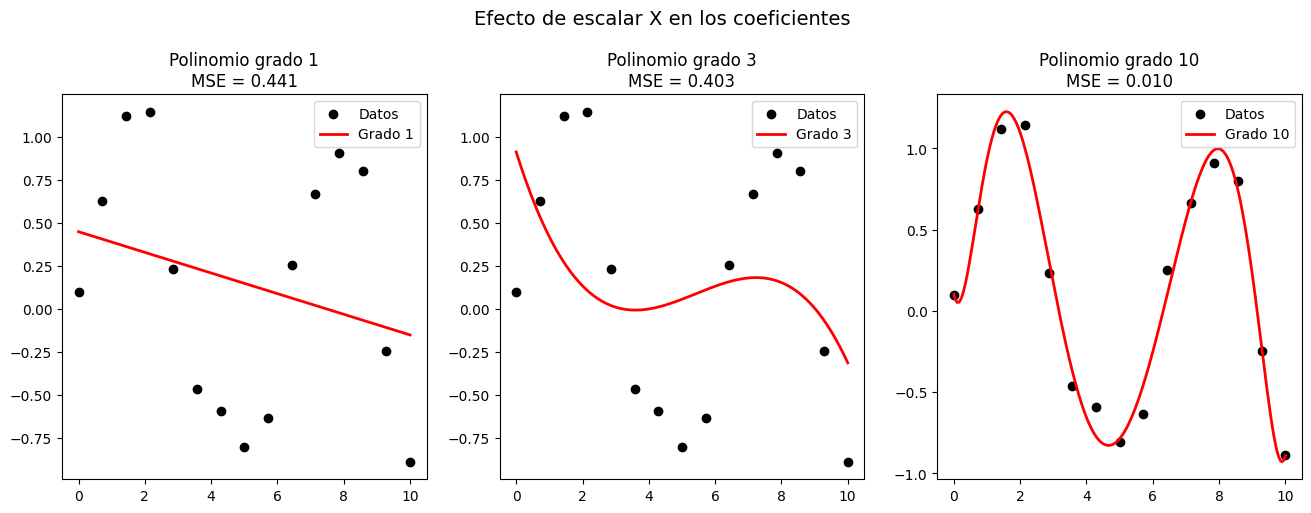

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Dataset artificial
np.random.seed(42)
X = np.linspace(0, 10, 15).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=len(X))

# Grados a probar
grados = [1, 3, 10]

plt.figure(figsize=(16,5))

for i, grado in enumerate(grados, 1):
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predicciones en un rango más fino
    X_test = np.linspace(0, 10, 200).reshape(-1, 1)
    X_test_poly = poly.transform(X_test)
    y_pred = model.predict(X_test_poly)

    # Predicciones sobre los datos originales (para calcular MSE)
    y_train_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_train_pred)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="black", label="Datos")
    plt.plot(X_test, y_pred, color="red", linewidth=2, label=f"Grado {grado}")
    plt.legend()
    plt.title(f"Polinomio grado {grado}\nMSE = {mse:.3f}")

plt.suptitle("Efecto de escalar X en los coeficientes", fontsize=14, y=1.05)
plt.show()


👉 Observa que:
- Con **grado 1 (lineal)**, el modelo no capta la forma sinusoidal → **subajuste**.  
- Con **grado 3**, el modelo se adapta bien a la tendencia general.  
- Con **grado 10**, el modelo pasa por casi todos los puntos, pero se ajusta al **ruido** → **sobreajuste**.  


## 📏 Supuestos de la regresión lineal (residuos)

En un modelo de regresión lineal, los **residuos** son:

$$
e_i = y_i - \hat{y}_i
$$

Los supuestos principales son:
1. La media de los residuos es **cero**.  
2. Los residuos siguen una distribución **aproximadamente normal**.  
3. La varianza de los residuos es **constante** (homocedasticidad).  
4. No hay correlación entre los residuos y la variable $X$.  

Veamos un ejemplo.


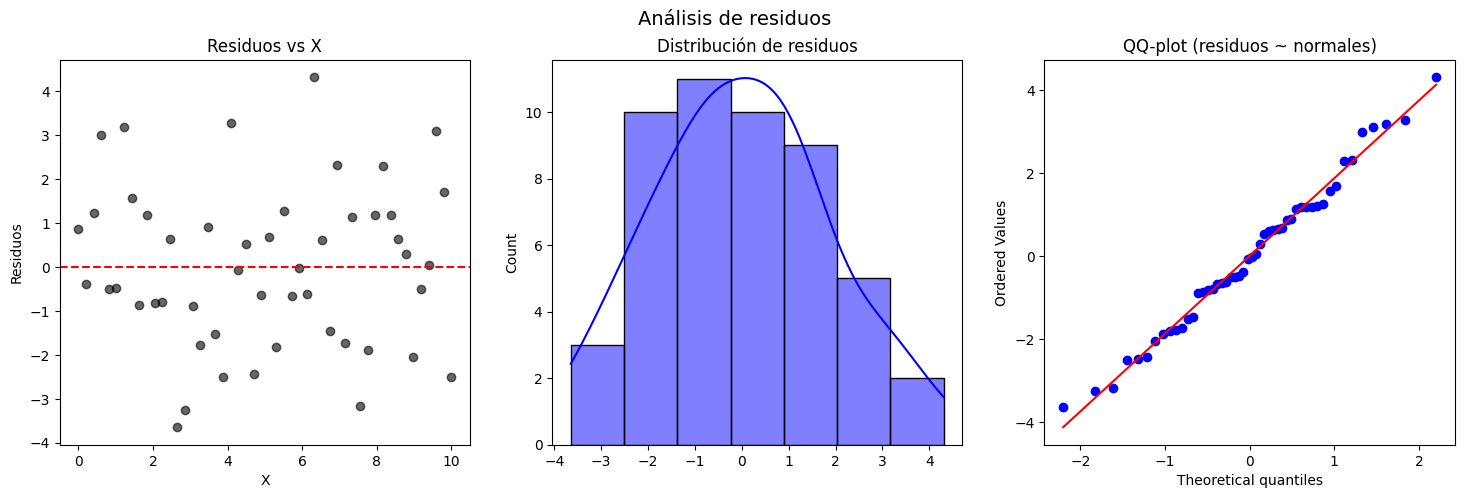

Media de residuos: -0.000
Varianza de residuos: 3.301


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Dataset artificial
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.normal(0, 2, size=len(X))

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

residuos = y - y_pred

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1. Residuos vs X
axes[0].scatter(X, residuos, color="black", alpha=0.6)
axes[0].axhline(0, color="red", linestyle="--")
axes[0].set_title("Residuos vs X")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Residuos")

# 2. Histograma de residuos
sns.histplot(residuos, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Distribución de residuos")

# 3. QQ-plot aproximado (residuos vs normal teórica)
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=axes[2])
axes[2].set_title("QQ-plot (residuos ~ normales)")

plt.suptitle("Análisis de residuos", fontsize=14)
plt.show()

print(f"Media de residuos: {np.mean(residuos):.3f}")
print(f"Varianza de residuos: {np.var(residuos):.3f}")


👉 Observa que:
- La **media de los residuos** es cercana a 0.  
- El histograma y el QQ-plot muestran que los residuos son **aproximadamente normales**.  
- El gráfico de residuos vs X no muestra un patrón → indica **homocedasticidad**.  
